In [1]:
import numpy as np
import pandas as pd
# from pymc3 import *
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('bmh')

## Probabilistic inference
 + The goal of probabilistic inference is to estimate the uncertainty of the given events
 + In this lab, we use a coin flip simulation to help you understand how the probabilistic inference works
 + In the following sections, we discuss two different kinds of methods, Frequentist and Bayesian 

### Frequentist interpretation
 + From the Frequentist interpretation, we can directly infer the probability of a coin flip by directly calculating the probability from the frequency


In [2]:
n_trials = 10
trials = np.random.choice(2, n_trials)
print("trials (1 is head, 0 is tail): ", trials)
print("probabity of flipping {} times of a coin is head: {}".format(n_trials, np.sum(trials[trials==1])/n_trials))
n_trials = 100
trials = np.random.choice(2, n_trials)
# print("trials (1 is head, 0 is tail): ", trials)
print("probabity of flipping {} times of a coin is head: {}".format(n_trials, np.sum(trials[trials==1])/n_trials))
n_trials = 1000000
trials = np.random.choice(2, n_trials)
# print("trials (1 is head, 0 is tail): ", trials)
print("probabity of flipping {} times of a coin is head: {}".format(n_trials, np.sum(trials[trials==1])/n_trials))

trials (1 is head, 0 is tail):  [0 1 0 1 0 0 0 0 0 0]
probabity of flipping 10 times of a coin is head: 0.2
probabity of flipping 100 times of a coin is head: 0.46
probabity of flipping 1000000 times of a coin is head: 0.499384


 + If you run the above cell several times, you will see that when the number of samples is low (e.g., 10), the probability may be various quite a bit, for example, you may see seldom times, 0.3, or 0.7, and more times 0.4, 0.5, or 0.6
 + , which means, even the underline probability is the same that the head is equal to the tail, the probability interpretation results may be different due to the randomness
 + We can illustrate this kine of randomness by sampling with more batches

Text(0, 0.5, 'frequency')

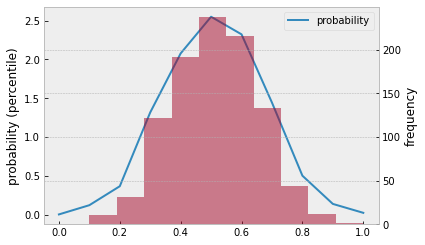

In [3]:
n_trials = 10
n_sample = 1000
prob = []

for i in range(n_sample):
    trials = np.random.choice(2, n_trials)
    prob.append(np.sum(trials[trials==1])/n_trials)

df = pd.DataFrame(prob)
ax = df.plot.kde(ind=[i/n_trials for i in range(n_trials+1)], label="probability")
df.plot.hist(ax=ax, secondary_y=True, label="frequency", alpha=0.5)
ax.legend(["probability","frequency"])
ax.set_ylabel("probability (percentile)")
ax.right_ax.set_ylabel("frequency")

 + When you increase `n_trials` in each batch in the above cell, you will see the distribution will become more narrow and near to the ground truth

### Bayesian inference
 + For Bayesian inference, it is different than what we have done in frequentist interpretation
 + We first have some believe true value `p`, but have no prior opinion on what `p` is
 + We flip a coin a few times and record what's observed for each flip
 + How does our beliefs change as we observe more data?

#### Beta distribution
 + We use beta distribution to illustrate the probability of the coin flip
 + Beta distribution is a continuous distribution between `[0,1]`
 + It has two variable $\alpha$ and $\beta$, which determines the shape of beta distribution
 + With in beta distribution, we can directly set $\alpha = 1 + heads$ and $\beta = 1 + tails$ to get the posterior inference probability distribution
 + an example is shown below

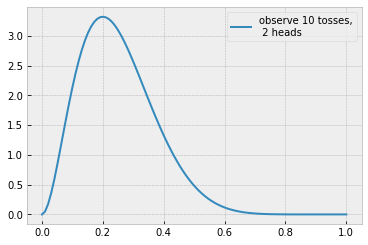

In [4]:
dist = stats.beta
x = np.linspace(0, 1, 100)
N = 10
heads = 2
y = dist.pdf(x, 1 + heads, 1 + N - heads)
plt.plot(x, y, label='observe %d tosses,\n %d heads' % (N, heads))
plt.legend()

 + To illustrate how the posterior probabilities are updated when we get more samples, we can illustrate the beta distribution of it in a sequence
 + In the sequence, we gradually increase the number of samples
 + You can see that the beta distribution is updated and more close to the underline distribution of the coin flip

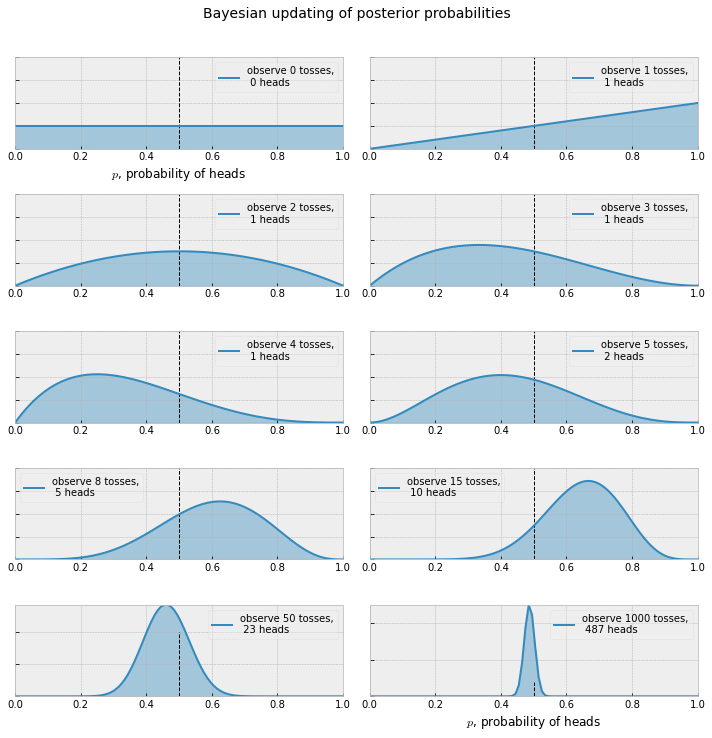

In [5]:

plt.figure(figsize=(10, 10))
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 1000]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel('$p$, probability of heads') if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label='observe %d tosses,\n %d heads' % (N, heads))
    plt.fill_between(x, 0, y, color='#348ABD', alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()


## References
 + [The Philosophy of Bayesian Inference](https://www.kaggle.com/mrisdal/the-philosophy-of-bayesian-inference)